In [ ]:
## Prediction model for profit of 50_startups data.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [29]:
startups = pd.read_csv("50_Startups.csv")
startups.head()
startups.shape

(50, 5)

In [42]:
startups.describe()

,RandDSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [43]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandDSpend      50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [18]:
startups.isna().sum()

RandDSpend        0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [19]:
# Correlation Matrix

In [20]:
startups.corr()

,RandDSpend,Administration,MarketingSpend,Profit
RandDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


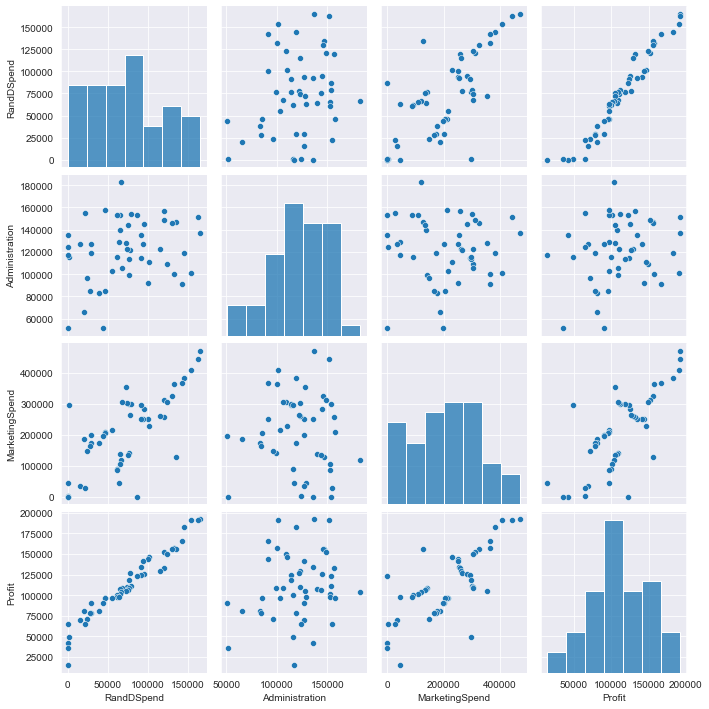

In [21]:
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [30]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration+MarketingSpend+RandDSpend',data=startups).fit()

In [17]:
#Coefficients
model.params

Intercept         50122.192990
Administration       -0.026816
MarketingSpend        0.027228
RandDSpend            0.805715
dtype: float64

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
Administration    -0.525507
MarketingSpend     1.655077
RandDSpend        17.846374
dtype: float64 
 Intercept         1.057379e-09
Administration    6.017551e-01
MarketingSpend    1.047168e-01
RandDSpend        2.634968e-22
dtype: float64


In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [5]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           4.53e-30
Time:                        16:15:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
RandDSpend         0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# Simple Linear Regression Models

In [55]:
ml_v=smf.ols('Profit~Administration',data = startups).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [56]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 17 Oct 2021   Prob (F-statistic):              0.162
Time:                        12:28:40   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
## Calculating VIF

In [32]:
rsq_Administration = smf.ols('Administration~MarketingSpend+RandDSpend',data=startups).fit().rsquared  
vif_Administration = 1/(1-rsq_hp) 

rsq_MarketingSpend = smf.ols('MarketingSpend~Administration+RandDSpend',data=startups).fit().rsquared  
vif_MarketingSpend = 1/(1-rsq_wt) 

rsq_RandDSpend = smf.ols('RandDSpend~Administration+MarketingSpend',data=startups).fit().rsquared  
vif_RandDSpend = 1/(1-rsq_vol) 


In [33]:
# Storing vif values in a data frame
d1 = {'Variables':['MarketingSpend','Administration','RandDSpend'],'VIF':[vif_MarketingSpend,vif_Administration,vif_RandDSpend]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,MarketingSpend,2.326773
1,Administration,1.175091
2,RandDSpend,2.468903


In [34]:
# Residual Analysis

In [35]:
# Test for Normality of Residuals (Q-Q Plot)

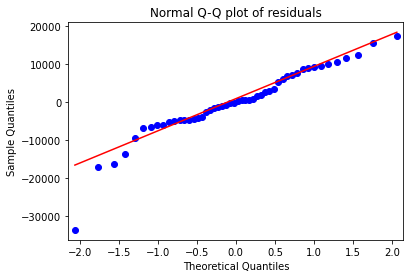

In [31]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [37]:
list(np.where(model.resid>5)) 

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [38]:
## Residual Plot for Homoscedasticity 

In [39]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

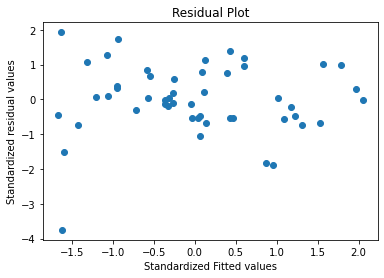

In [40]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [41]:
# Residual Vs Regressors

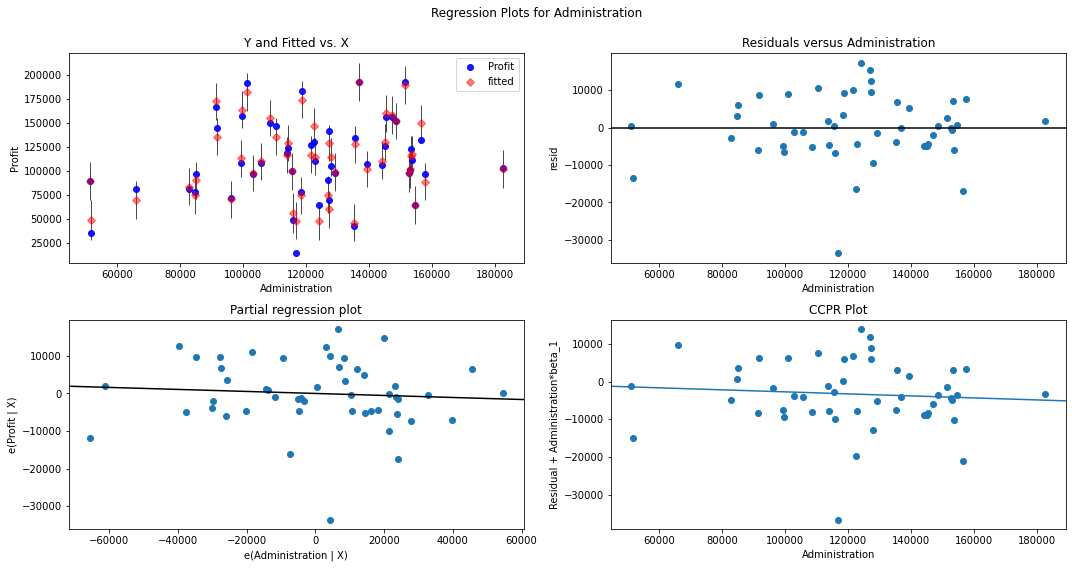

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

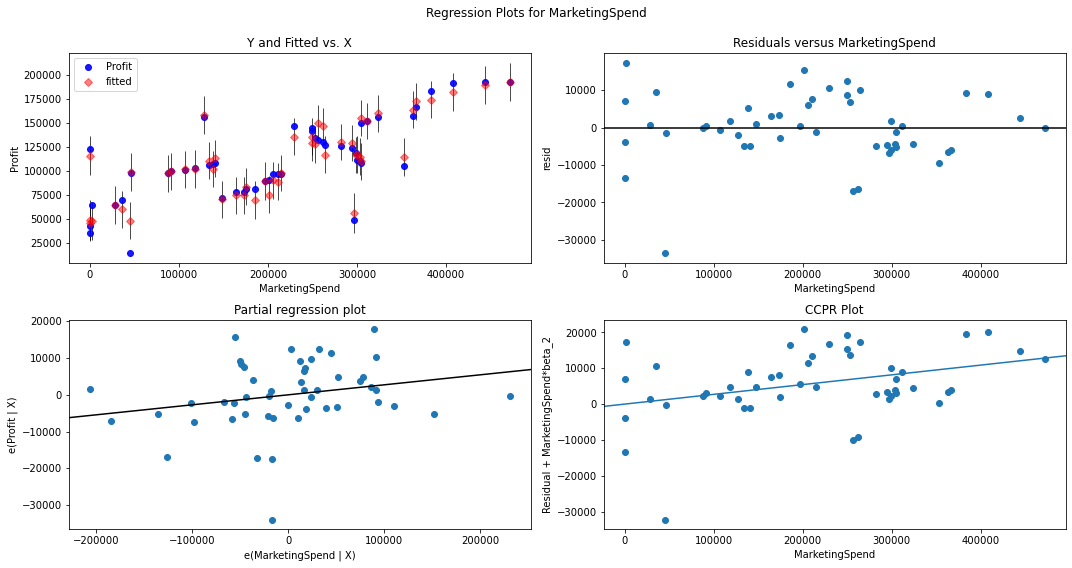

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

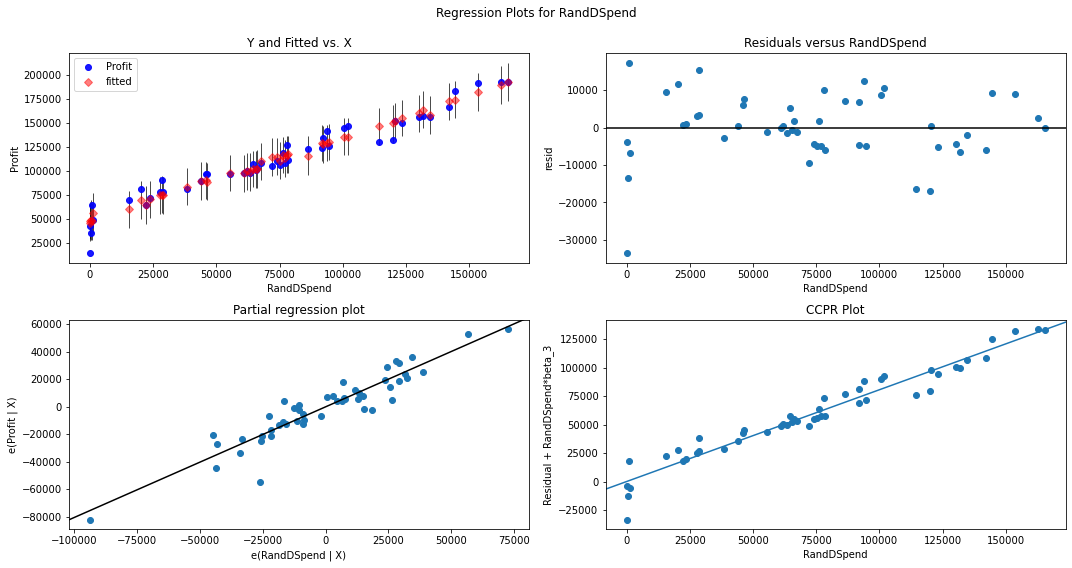

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RandDSpend", fig=fig)
plt.show()

In [45]:
# Model Deletion Diagnostics

In [46]:
# Detecting Influencers/Outliers

In [47]:
# Cook’s Distance

In [27]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

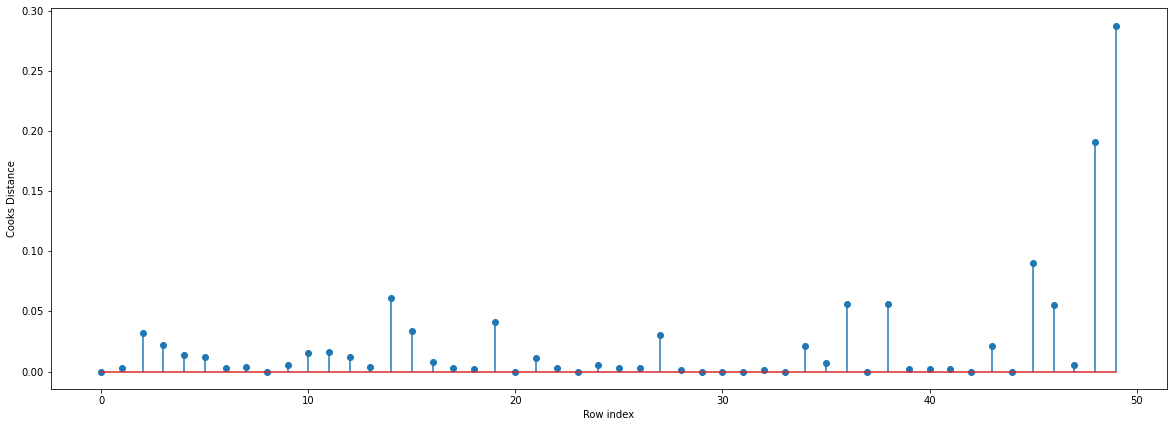

In [28]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [52]:
# High Influence points

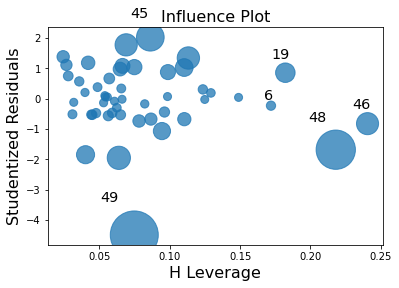

In [53]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
k = startups.shape[1]
n = startups.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [55]:
# From the above plot, it is evident that data point 46 and 48 are the influencers

In [5]:
startups[startups.index.isin([45,46, 48,49])]

,RandDSpend,Administration,MarketingSpend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [58]:
startups.head()

,RandDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [59]:
# Improving the model

In [8]:
#Load the data
startups_new = pd.read_csv("50_Startups.csv")

In [9]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startups1=startups_new.drop(startups_new.index[[45,46,48,49]],axis=0).reset_index()
startups1 

,index,RandDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [24]:
#Drop the original index
startups1=startups1.drop(['index'],axis=1)

In [59]:
startups1

,index,RandDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [65]:
# Build Model

In [55]:
#Exclude variable "MarketingSpend" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~Administration+RandDSpend',data = startups1).fit()

In [56]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.rsquared_adj)

(0.9593236359511779, 951.9187019793172, 0.9574317120419303)

In [51]:
#Exclude variable "Administration" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~MarketingSpend+RandDSpend',data = startups1).fit()

In [52]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.rsquared_adj)

(0.9611920624974509, 949.7556721616613, 0.9593870421484951)

In [53]:
#Exclude variable "RandDSpend" and generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~MarketingSpend+Administration',data = startups1).fit()

In [54]:
(final_ml_V.rsquared,final_ml_V.aic,final_ml_V.rsquared_adj)

(0.6301547351093424, 1053.460828235753, 0.6129526297655908)

In [14]:
##  Cook’s Distance

In [17]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

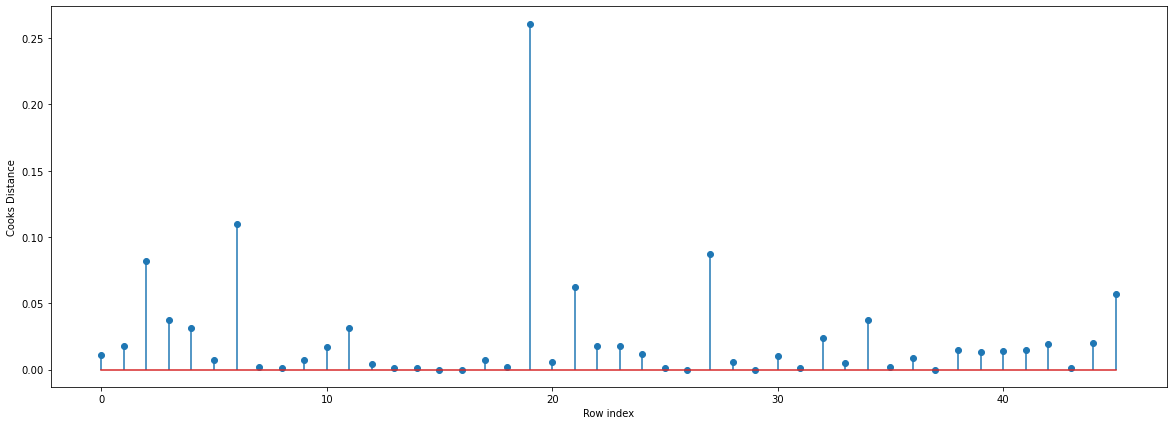

In [18]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [42]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(19, 0.2606926423623144)

In [43]:
#Drop 19 observations
startups2=startups1.drop(startups1.index[[19]],axis=0).reset_index()
startups2 

,level_0,index,RandDSpend,Administration,MarketingSpend,State,Profit
0,0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,9,123334.88,108679.17,304981.62,California,149759.96


In [44]:
#Build the model on the new data
final_ml_V= smf.ols('Profit~MarketingSpend+RandDSpend',data = startups2).fit()

In [45]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

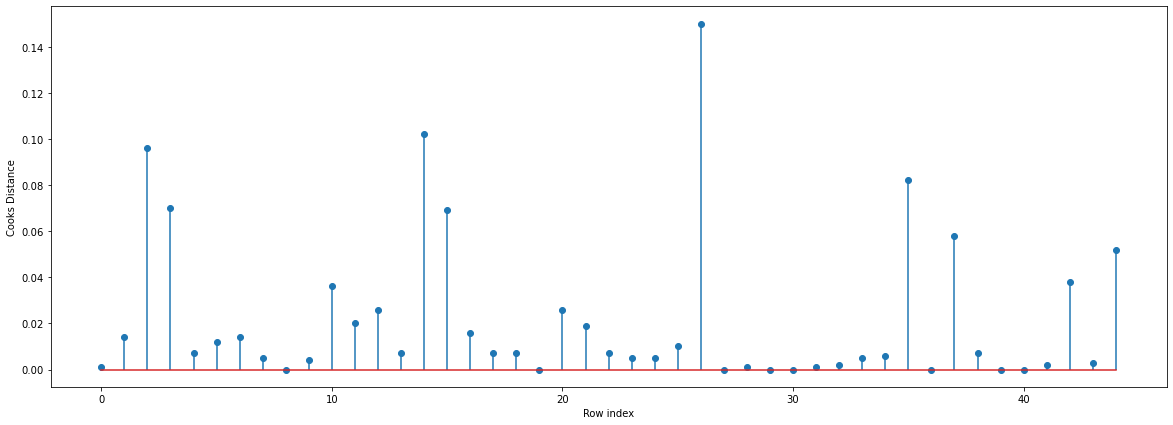

In [47]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [48]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(26, 0.14998982219852355)

In [ ]:
## Since the value is <1 , we can stop the diagnostic process and finalize the model.

In [49]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Profit~MarketingSpend+RandDSpend',data = startups2).fit()

In [50]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9624820303388749, 928.6897834534842)

In [32]:
#  Predicting for new data

In [33]:
#New data for prediction
new_data=pd.DataFrame({'RandDSpend':147270,"Administration":97500,"MarketingSpend":300115},index=[1])

In [34]:
final_ml_V.predict(new_data)

1    172646.969511
dtype: float64

In [36]:
final_ml_V.predict(startups_new.iloc[0:5,])

0    188520.346351
1    185066.250189
2    179716.058313
3    171402.426423
4    170607.725134
dtype: float64

In [37]:
pred_y = final_ml_V.predict(startups_new)

In [38]:
pred_y

0     188520.346351
1     185066.250189
2     179716.058313
3     171402.426423
4     170607.725134
5     162368.106979
6     156530.608926
7     158017.931024
8     150179.203956
9     154085.021668
10    135954.210358
11    136419.664623
12    129534.915210
13    127786.697663
14    148030.468605
15    145700.961093
16    118150.331557
17    130052.453621
18    129647.309026
19    116663.517840
20    118011.884447
21    117713.614776
22    115977.321789
23    111944.817652
24    115550.938133
25    104150.059987
26    111913.272620
27    115489.344539
28    102631.413445
29    103471.980359
30    102173.969235
31     99650.999358
32    101510.782308
33    100806.007253
34     91185.768451
35     94282.711778
36     78988.749192
37     94250.427121
38     75194.126862
39     88007.032086
40     78795.974130
41     79591.293245
42     75418.597900
43     65055.700438
44     68604.508317
45     53421.166019
46     61104.406900
47     52069.371533
48     56552.143943
49     54043.890273


In [39]:
pd.options.display.max_rows = 50

In [40]:
pred_y

0     188520.346351
1     185066.250189
2     179716.058313
3     171402.426423
4     170607.725134
5     162368.106979
6     156530.608926
7     158017.931024
8     150179.203956
9     154085.021668
10    135954.210358
11    136419.664623
12    129534.915210
13    127786.697663
14    148030.468605
15    145700.961093
16    118150.331557
17    130052.453621
18    129647.309026
19    116663.517840
20    118011.884447
21    117713.614776
22    115977.321789
23    111944.817652
24    115550.938133
25    104150.059987
26    111913.272620
27    115489.344539
28    102631.413445
29    103471.980359
30    102173.969235
31     99650.999358
32    101510.782308
33    100806.007253
34     91185.768451
35     94282.711778
36     78988.749192
37     94250.427121
38     75194.126862
39     88007.032086
40     78795.974130
41     79591.293245
42     75418.597900
43     65055.700438
44     68604.508317
45     53421.166019
46     61104.406900
47     52069.371533
48     56552.143943
49     54043.890273


In [57]:
## Consider only the below columns and prepare a prediction model for predicting Price.
## Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
#Read the data
TC= pd.read_csv("ToyotaCorolla.csv")
TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [92]:
TC_df=(TC[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']])

In [93]:
print(TC_df)

      Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]


In [63]:
## Correlation Matrix

In [94]:
TC_df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


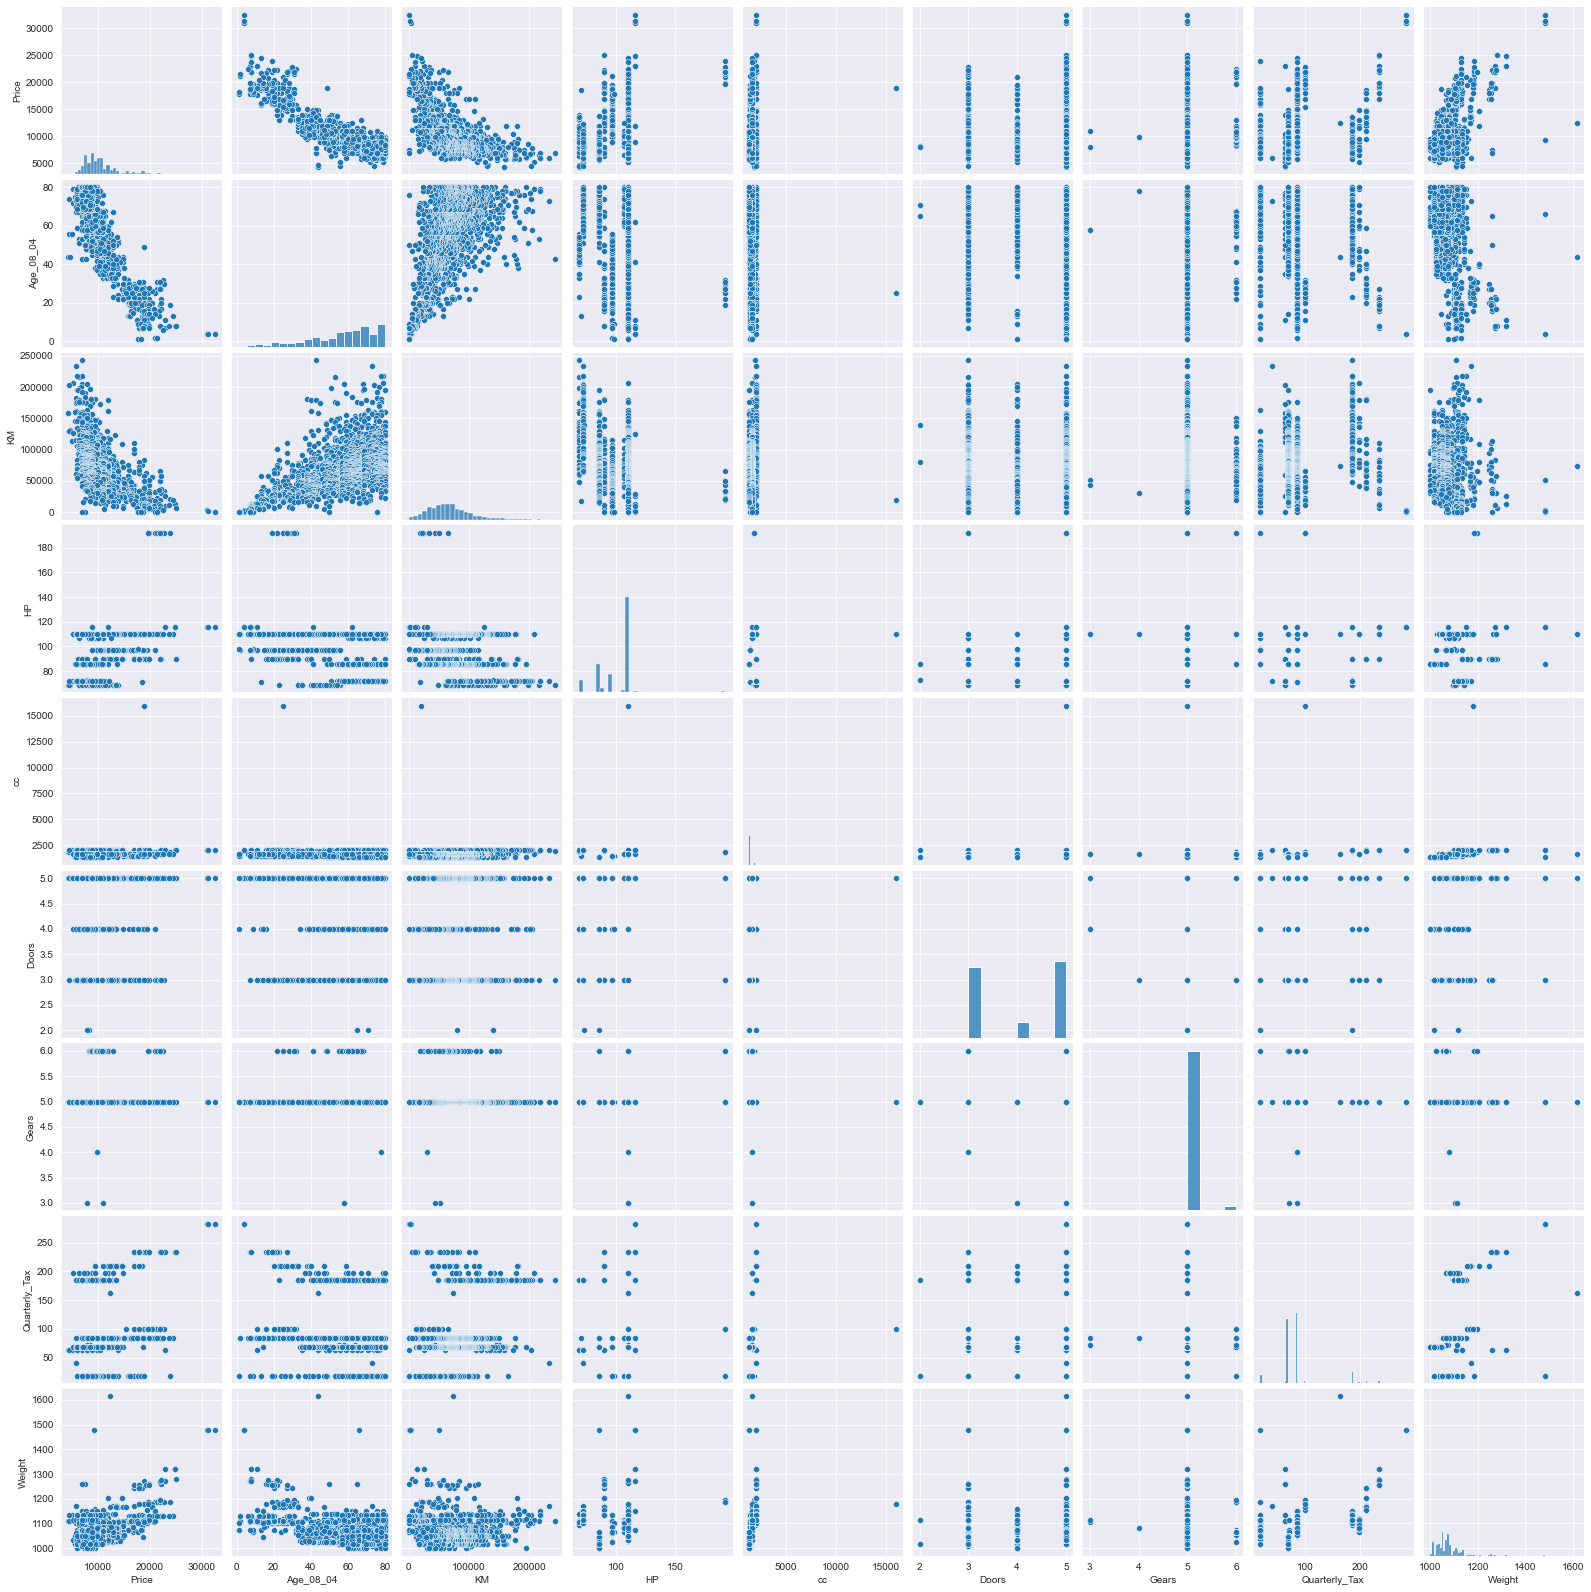

In [95]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(TC_df)

In [96]:
## Preparing a model

In [115]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC_df).fit()

In [98]:
#Coefficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [99]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [100]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [101]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:22:18   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
## Simple Linear Regression Models

In [107]:
ml_v=smf.ols('Price~KM',data = TC_df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues) 

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [108]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          1.76e-124
Time:                        11:45:29   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
ml_v=smf.ols('Price~Doors',data = TC_df).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [110]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.46e-12
Time:                        11:46:04   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
ml_wv=smf.ols('Price~KM+Doors',data = TC_df).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  
ml_wv.summary()

Intercept    32.374684
KM          -26.505007
Doors         7.750066
dtype: float64 
 Intercept    4.962430e-173
KM           2.668432e-126
Doors         1.729168e-14
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     389.2
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          9.69e-136
Time:                        11:47:13   Log-Likelihood:                -13495.
No. Observations:                1436   AIC:                         2.700e+04
Df Residuals:                    1433   BIC:                         2.701e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.194e+04    368.691     32.375      0.000    1.12e+04    1.27e+04
KM            -0.0545      0.002    -26.505      0.000      -0.059      -0.051
Doors        627.8377     81.011      7.750      0.000     468.926     786.750
==============================================================================
Omnibus:                      385.757   Durbin-Watson:                   0.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.718
Skew:                           1.379   Prob(JB):                    9.48e-235
Kurtosis:                       6.225   Cond. No.                     3.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
## Calculating VIF

In [248]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC_df).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC_df).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=TC_df).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=TC_df).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=TC_df).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 

rsq_Gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=TC_df).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 
rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=TC_df).fit().rsquared  
vif_Quarterly_Tax= 1/(1-rsq_Quarterly_Tax) 

rsq_Weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=TC_df).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 

# Storing vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


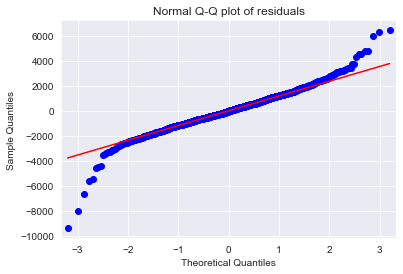

In [121]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [122]:
list(np.where(model.resid>5)) 

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [123]:
## Residual Plot for Homoscedasticity

In [124]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

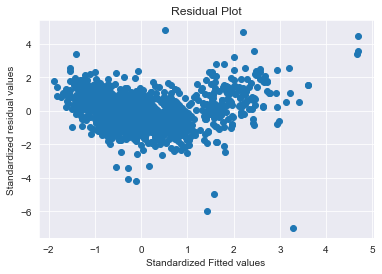

In [125]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [126]:
## Residual Vs Regressors

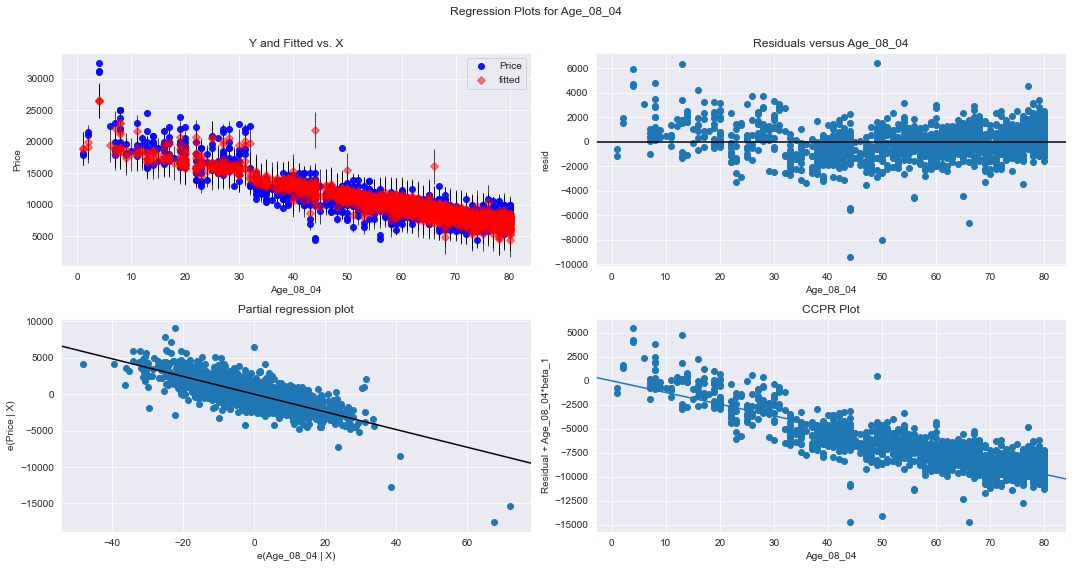

In [127]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

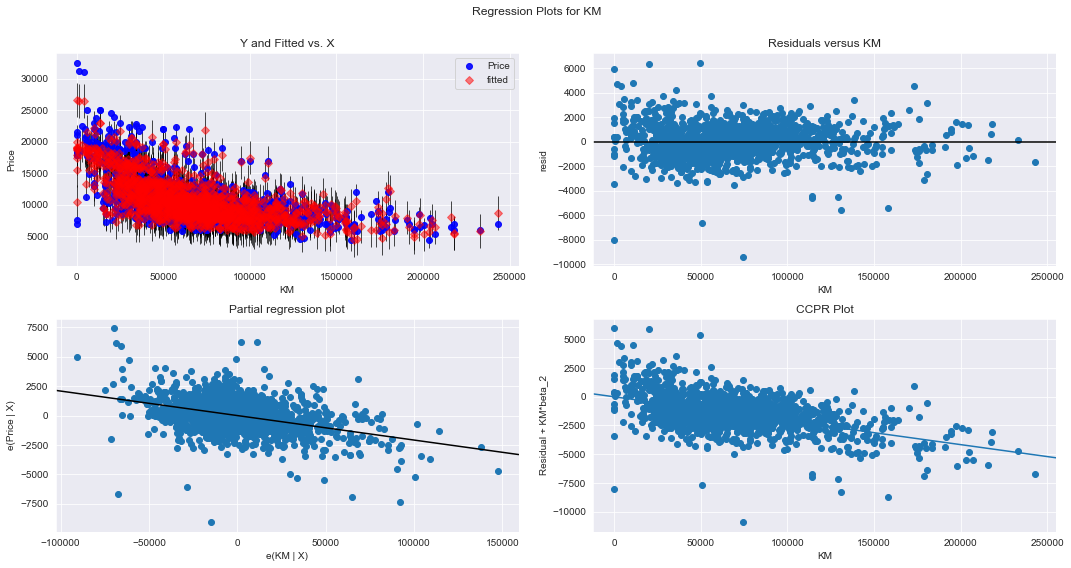

In [128]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

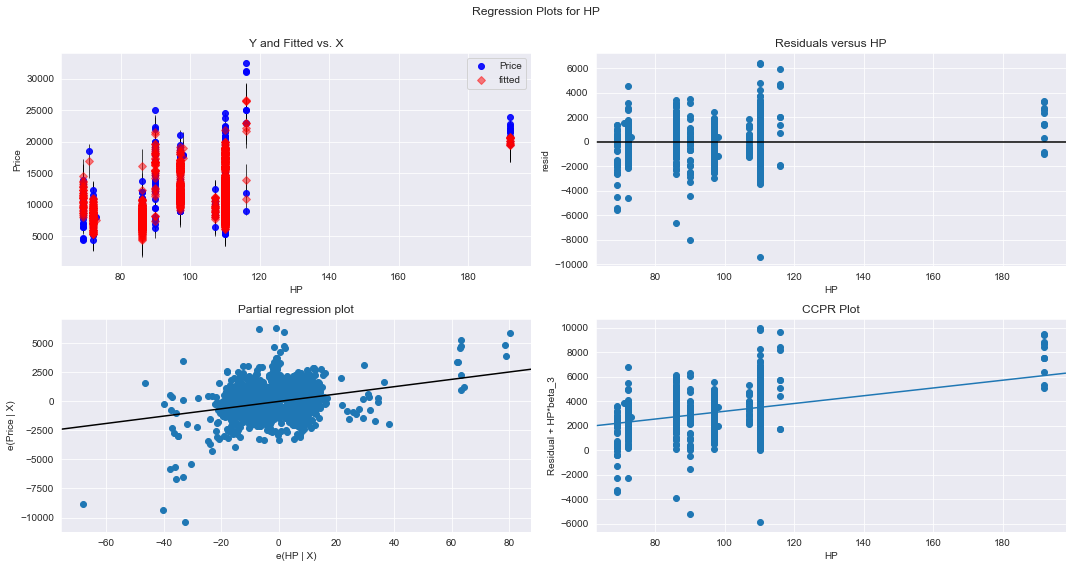

In [129]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

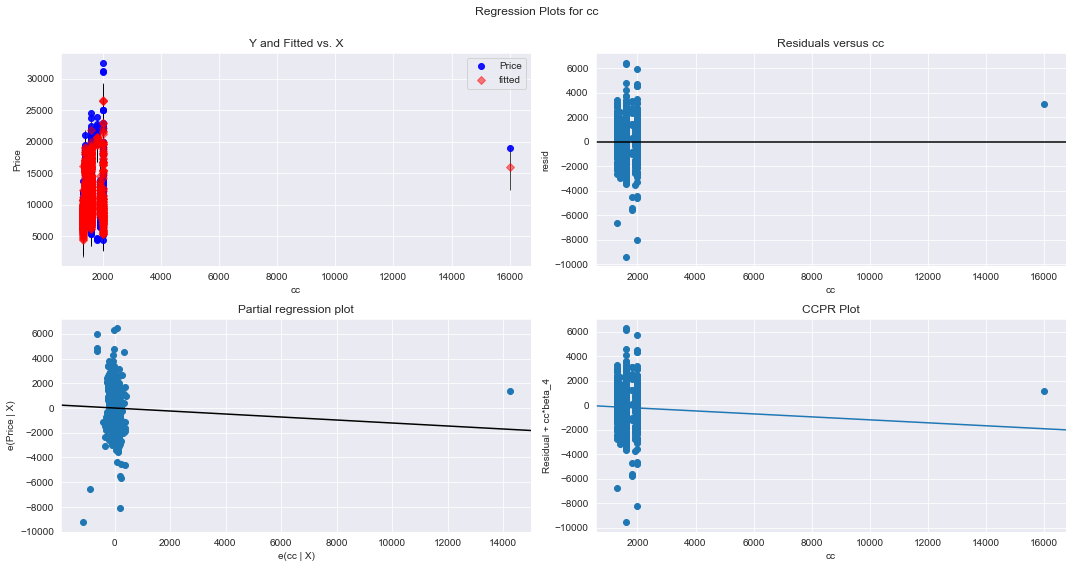

In [130]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

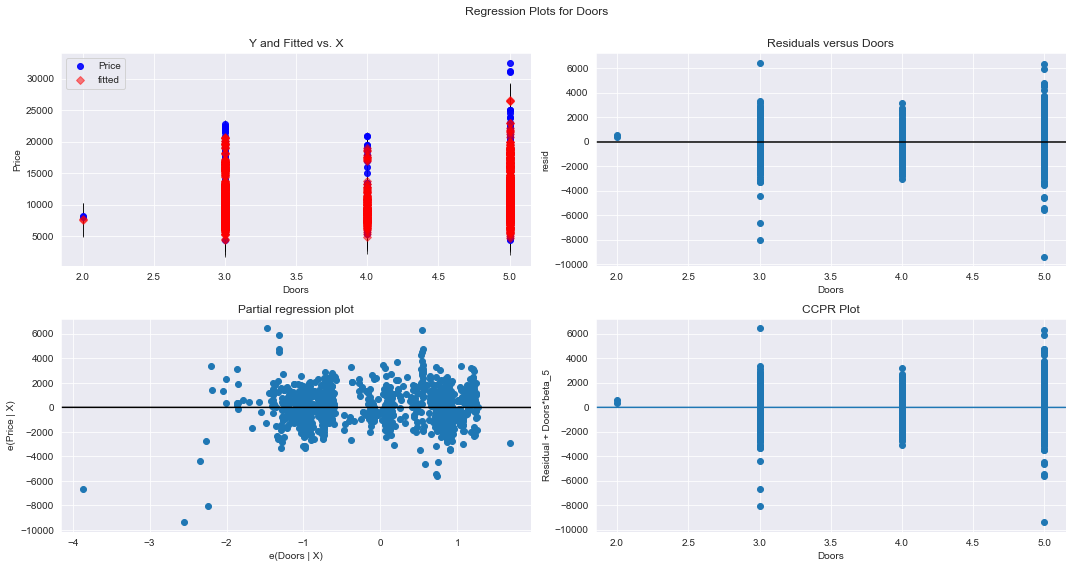

In [131]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

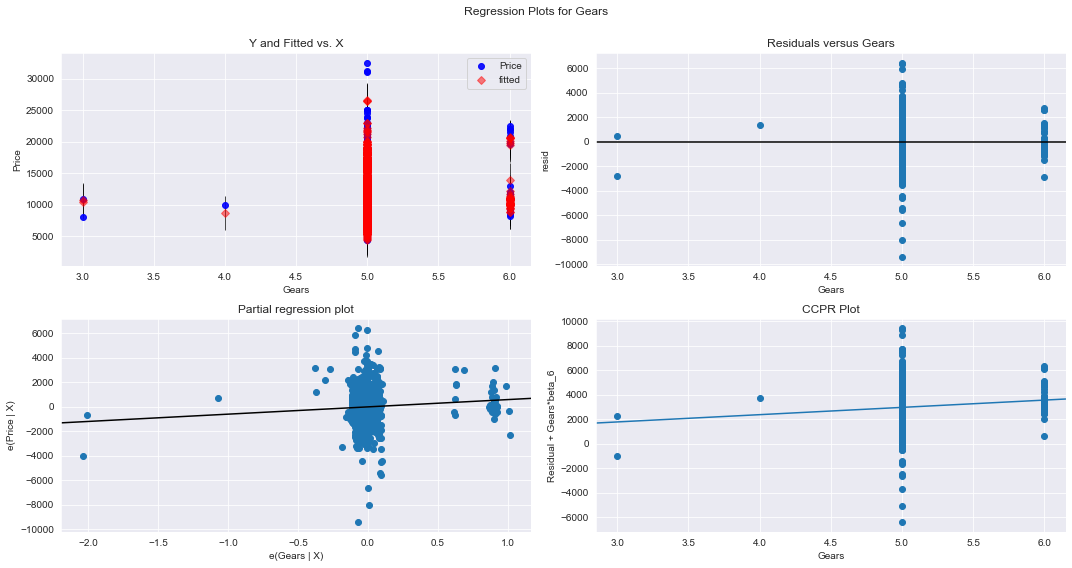

In [132]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

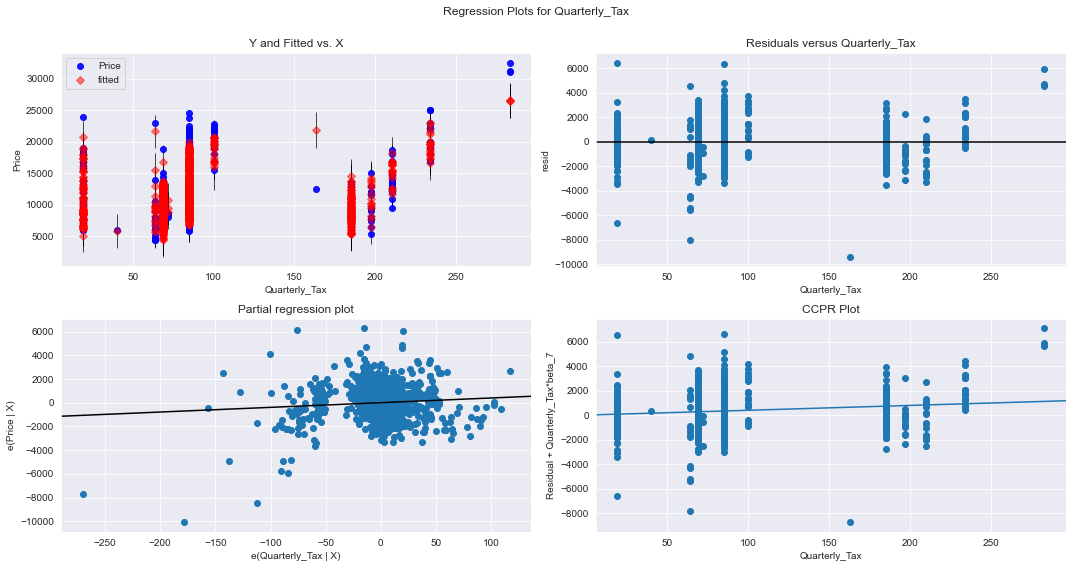

In [133]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

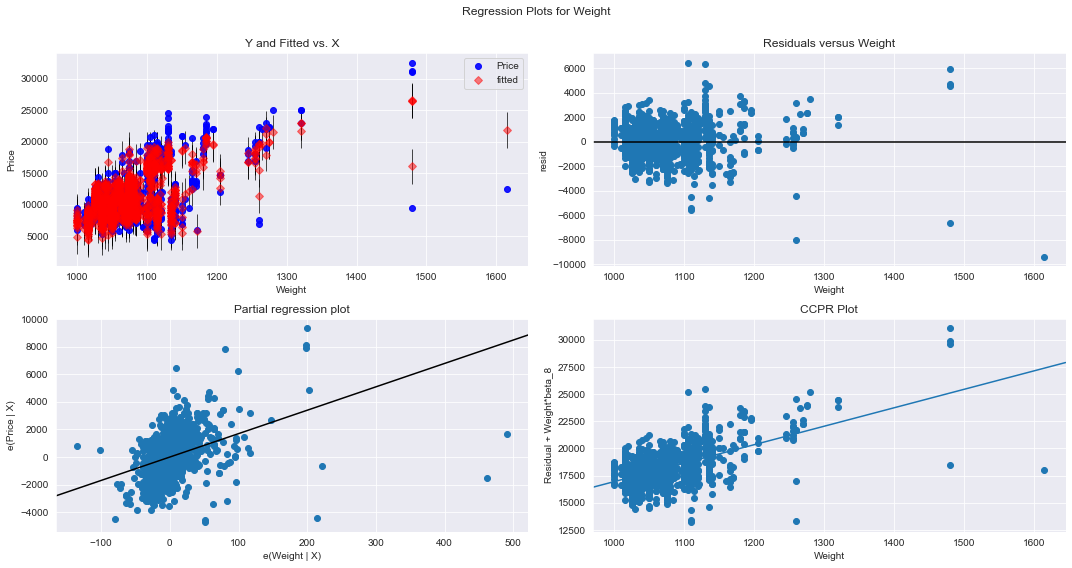

In [134]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [135]:
## Cook’s Distance

In [136]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

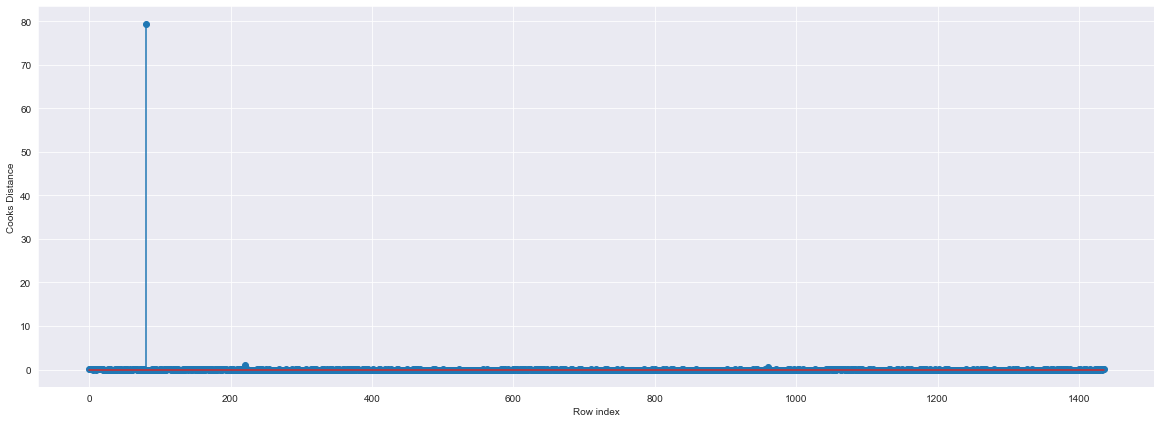

In [249]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(TC_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [250]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

In [140]:
## High Influence points

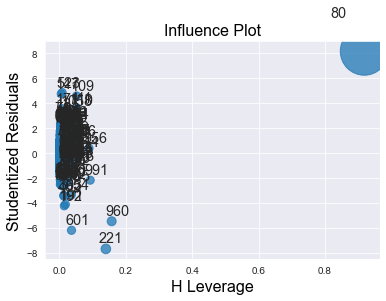

In [141]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [143]:
k = TC_df.shape[1]
n = TC_df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [144]:
# From the above plot, it is evident that data point 80 is the influencers

In [145]:
TC_df[TC_df.index.isin([80])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [146]:
#See the differences in HP and other variable values
TC_df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [147]:
## Improving the model

In [7]:
#Load the data
TC_df_new= pd.read_csv("ToyotaCorolla.csv")

In [8]:
#Discard the data points which are influencers and reasign the row number (reset_index())
TC_df1=TC_df_new.drop(TC_df_new.index[[80]],axis=0).reset_index()
TC_df1 

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,...,1,1,1,0,1,1,1,0,0,0
1431,1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,...,0,0,1,0,0,1,1,0,0,0
1432,1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,...,0,0,1,0,0,0,1,0,0,0
1433,1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,...,0,0,0,0,0,0,1,0,0,0


In [9]:
#Drop the original index
TC_df1=TC_df1.drop(['index'],axis=1)

In [10]:
TC_df1

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [155]:
## Build Model

In [32]:
#Exclude variable "Doors" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+cc+HP+KM+Weight+Gears+Quarterly_Tax',data = TC_df1).fit()

In [33]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8693349475698541, 24685.765438793034)

In [16]:
#Exclude variable "Weight" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+cc+HP+KM+Doors+Gears+Quarterly_Tax',data = TC_df1).fit()

In [157]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8394508024403655, 24981.322667036107)

In [251]:
#Exclude variable "Quarterly_Tax" and generate R-Squared and AIC values
final_ml_V= smf.ols('Price~Age_08_04+Weight+HP+KM+Doors+Gears+cc',data = TC_df1).fit()

In [253]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8656883979875687, 24725.264231919595)

In [176]:
## Cook’s Distance

In [18]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

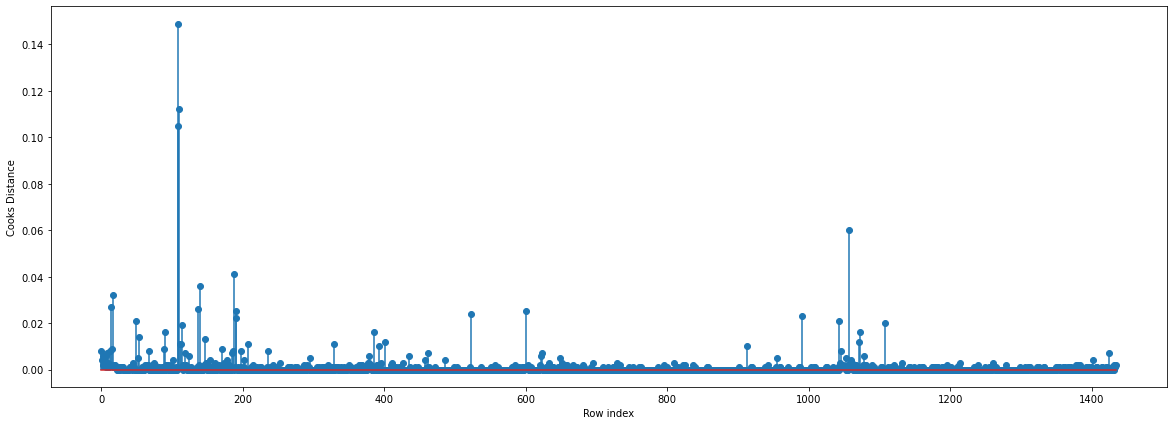

In [19]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(TC_df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [179]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 2.585431186190019)

In [11]:
#Drop 220 observation
TC_df2=TC_df1.drop(TC_df1.index[[220]],axis=0)

In [12]:
TC_df2

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1431,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [13]:
#Reset the index and re arrange the row values
TC_df3=TC_df2.reset_index()

In [102]:
TC_df4=TC_df3.drop(['index'],axis=1)

KeyError: "['index'] not found in axis"

In [82]:
TC_df4

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [67]:
#Build the model on the new data
final_ml_V= smf.ols('Price~cc+HP+KM+Gears+Age_08_04+Weight+Quarterly_Tax',data = TC_df4).fit()

In [68]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

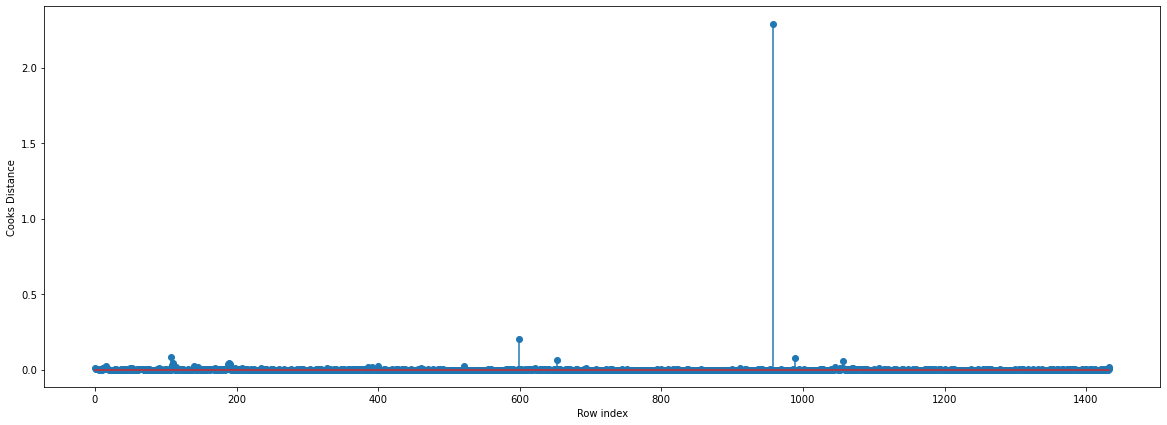

In [69]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(TC_df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [70]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(958, 2.2907159163032595)

In [83]:
#Drop 958 observation
TC_df5=TC_df4.drop(TC_df1.index[[958]],axis=0)

In [84]:
TC_df5

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1430,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1431,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1432,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [95]:
#Build the model on the new data
final_ml_V= smf.ols('Price~Weight+cc+HP+KM+Gears+Age_08_04',data = TC_df5).fit()

In [96]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

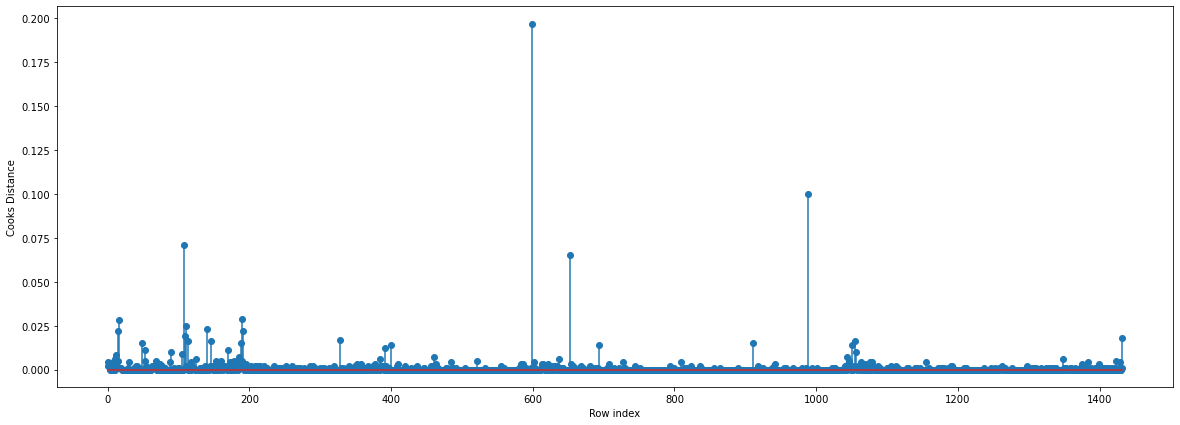

In [97]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(TC_df5)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [98]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(599, 0.1967725277332872)

In [189]:
## Since the value is <1 , we can stop the diagnostic process and finalize the model

In [99]:
#Check the accuracy of the model
final_ml_V= smf.ols('Price~Weight+cc+HP+KM+Gears+Age_08_04',data = TC_df5).fit()

In [100]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8830014474578607, 24492.706990835122)

In [1]:
## Predicting for new data

In [4]:
#New data for prediction
new_data=pd.DataFrame({'Age_08_04':35,"KM":25000,"HP":100,"Doors":4,"Gears":6,"Quarterly_Tax":50,"cc":1000,"Weight":1150},index=[1])

In [20]:
final_ml_V.predict(new_data)

1    14525.754567
dtype: float64

In [22]:
final_ml_V.predict(TC_df_new.iloc[0:5,])

0    16957.341966
1    16454.131988
2    16922.894011
3    16527.476857
4    16164.752058
dtype: float64

In [23]:
pred_y = final_ml_V.predict(TC_df_new)

In [24]:
pred_y

0       16957.341966
1       16454.131988
2       16922.894011
3       16527.476857
4       16164.752058
            ...     
1431     8772.555487
1432     8392.291978
1433     8567.497562
1434     8706.170927
1435     8614.147957
Length: 1436, dtype: float64

In [25]:
pd.options.display.max_rows = 1436

In [26]:
pred_y 

0       16957.341966
1       16454.131988
2       16922.894011
3       16527.476857
4       16164.752058
5       15454.991065
6       15486.899808
7       15439.750406
8       19728.289228
9       15123.611074
10      20379.402106
11      20554.026456
12      20365.285622
13      19723.061716
14      19370.488722
15      20215.888669
16      19040.798295
17      16162.298564
18      14910.755490
19      14515.012057
20      14451.003111
21      15315.853139
22      14943.800733
23      15411.680721
24      15399.183122
25      15894.986803
26      15503.331459
27      15096.648265
28      15180.503912
29      15547.939200
30      14021.588854
31      15662.199828
32      15088.842501
33      15163.875346
34      15549.713948
35      14963.995247
36      15449.763468
37      16014.093656
38      14486.243887
39      15127.817957
40      15393.443700
41      14806.551612
42      15434.125543
43      15926.569829
44      16807.135189
45      16985.500980
46      16528.246157
47      15207